<a href="https://colab.research.google.com/github/JoYongJIn/YongJin-Repository/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive #구글과 코랩 연결(mount)
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/diabetes_prediction_dataset.csv",sep = ",")
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
data.isnull().sum() #결측치 없음

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
data.diabetes.value_counts(normalize = True).mul(100)

0    91.5
1     8.5
Name: diabetes, dtype: float64

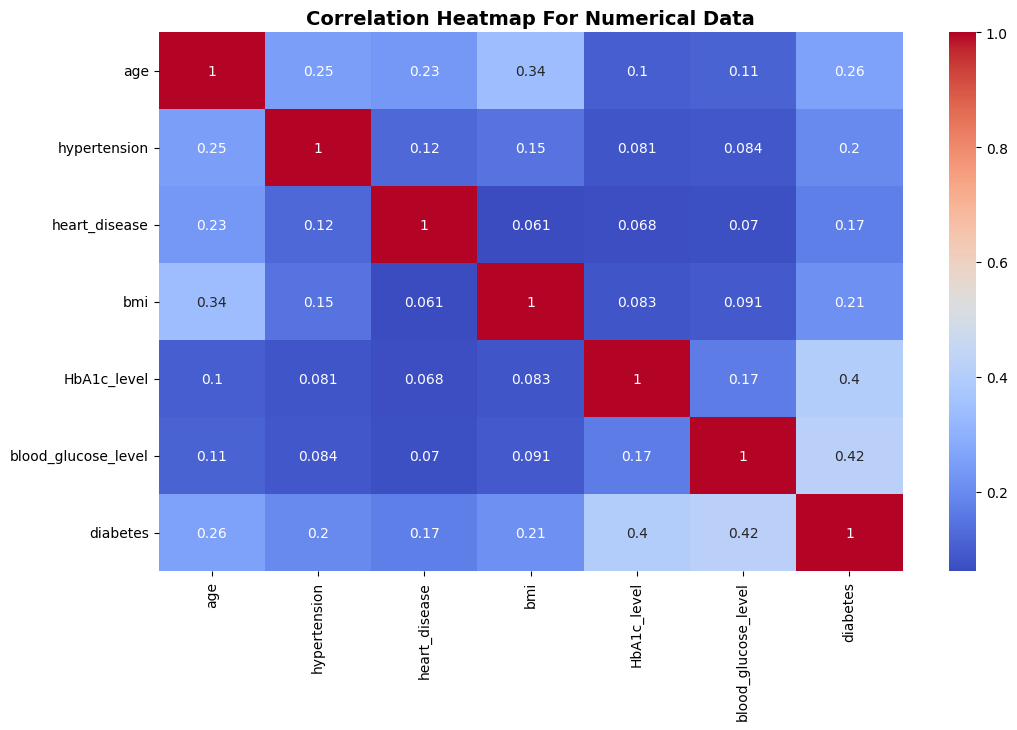

In [ ]:
#EDA과정 상관과계 분석
con_cols = [x for x in data.dtypes.index if data.dtypes[x] != 'object']

plt.figure(figsize = (12,7))
sns.heatmap(data[con_cols].corr(), annot = True, cmap = 'coolwarm')
plt.title("Correlation Heatmap For Numerical Data", fontsize = '14', fontweight= 'bold')
plt.show()

In [ ]:
pd.crosstab(data.gender, data.diabetes, margins = True) #변수상관 관계 분석(EDA)

diabetes,0,1,All
gender,,,
Female,54091,4461,58552
Male,37391,4039,41430
Other,18,0,18
All,91500,8500,100000


In [ ]:
pd.crosstab(data.smoking_history, data.diabetes, margins = True) #변수상관 관계 분석

diabetes,0,1,All
smoking_history,,,
No Info,34362,1454,35816
current,8338,948,9286
ever,3532,472,4004
former,7762,1590,9352
never,31749,3346,35095
not current,5757,690,6447
All,91500,8500,100000


In [ ]:
#전처리 흡연경력을 숫자형식으로 변경
smoking_history_mapping = {'never': 0, 'No Info': -1, 'current': 2, 'former': 1, 'ever': 2, 'not current': 0}
data['smoking_history'] = data['smoking_history'].map(smoking_history_mapping)

data.describe()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,0.001160,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,0.991609,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,-1.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,-1.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,2.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
#성별(범주형자료) one-hotencoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,-1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,-1,27.32,6.2,90,0
99996,0,2.0,0,0,-1,17.37,6.5,100,0
99997,1,66.0,0,0,1,27.83,5.7,155,0
99998,0,24.0,0,0,0,35.42,4.0,100,0


In [ ]:
#ANN으로 학습하여 regression하기

In [ ]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [ ]:
from sklearn import preprocessing #표준화하기(전처리)
stand = preprocessing.StandardScaler()
X_train = stand.fit_transform(X_train)
X_test = stand.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping #enarlystopping을 통해
#과접합방지, 효율적인 시간관리, 일반화 성능개선

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
#simoid로 활성함수 설정
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
#컴파일 설정
ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [ ]:
#early stopping 실행
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
deep_history = ann.fit(X_train, y_train, epochs=100,
                              validation_data = (X_test, y_test),
                              callbacks=[early_stop])

Epoch 1/100
2500/2500 [==============================] - 8s 3ms/step - loss: 0.1098 - accuracy: 0.9068 - val_loss: 0.0554 - val_accuracy: 0.9552
Epoch 2/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0450 - accuracy: 0.9583 - val_loss: 0.0395 - val_accuracy: 0.9571
Epoch 3/100
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0364 - accuracy: 0.9597 - val_loss: 0.0353 - val_accuracy: 0.9582
Epoch 4/100
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0338 - accuracy: 0.9605 - val_loss: 0.0339 - val_accuracy: 0.9589
Epoch 5/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0328 - accuracy: 0.9607 - val_loss: 0.0333 - val_accuracy: 0.9587
Epoch 6/100
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0323 - accuracy: 0.9607 - val_loss: 0.0330 - val_accuracy: 0.9590
Epoch 7/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0321 - accuracy: 0.9607 - val_loss: 0.0329 - val_ac

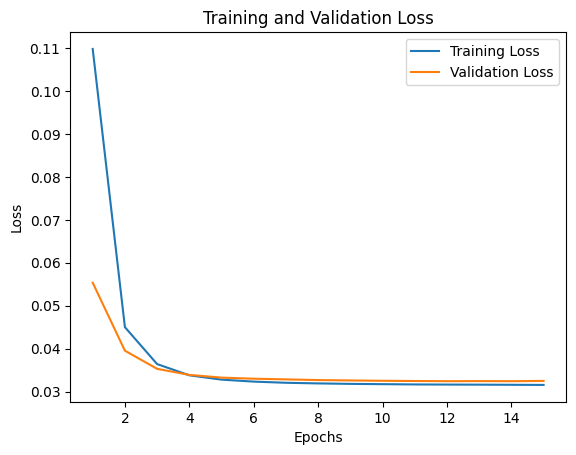

In [ ]:
# epoch에 따른 loss 그래프 작성

loss = deep_history.history['loss']
val_loss = deep_history.history['val_loss']

plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
#모델을 통과한 testset의 결과값 0.5를 넘으면 양성(True)이다.
y_pred_ann = ann.predict(X_test)
y_pred_ann = (y_pred_ann>0.5)

625/625 [==============================] - 1s 1ms/step


In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

X_a = data[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']].values  # 입력 데이터 (feature들)
y = data['diabetes']

import pandas as pd

X = pd.DataFrame(X_a, columns=['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level'])

k = 5

kf = KFold(n_splits=k)

accuracy_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    ann.fit(X_train, y_train)
    y_pred = ann.predict(X_test)
    y_pred = (y_pred > 0.5)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

print("Accuracy scores:", accuracy_scores)
print("Mean accuracy:", np.mean(accuracy_scores))
print("Standard deviation:", np.std(accuracy_scores))

625/625 [==============================] - 1s 2ms/step
Accuracy scores: [0.08635, 0.0865, 0.0878, 0.08055, 0.0838]
Mean accuracy: 0.08499999999999999
Standard deviation: 0.002575072814504476


In [ ]:
#accuracy출력
df = pd.DataFrame({
    'Model Name': ['ANN'],
    'True Negative': [confusion_matrix(y_test, y_pred_ann).ravel()[0]],
    'False Positive': [confusion_matrix(y_test, y_pred_ann).ravel()[1]],
    'False Negative': [confusion_matrix(y_test, y_pred_ann).ravel()[2]],
    'True Positive': [confusion_matrix(y_test, y_pred_ann).ravel()[3]],
    'Accuracy Score': [accuracy_score(y_test, y_pred_ann)],
    'F1 Score': [f1_score(y_test, y_pred_ann)],
})

print(df)

  Model Name  True Negative  False Positive  False Negative  True Positive  \
0        ANN          17295            1029            1581             95   

   Accuracy Score  F1 Score  
0          0.8695  0.067857  


In [ ]:
#L1 regularization을 통해 과접합 방지하여 accuracy 높이기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

X_train = data.iloc[:,:-1].values
y_train = data.iloc[:,-1].values

ann = Sequential()
ann.add(Dense(64, activation='relu', input_dim=7, kernel_regularizer=regularizers.l1(0.01)))
ann.add(Dense(1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10


ValueError: ignored